In [4]:
import numpy as np
import scipy.linalg as sp
n = 5 
c = np.zeros(n)
c[0] = -2
c[1] = 1
T = sp.toeplitz(c, c)
print T
e = 0.5
f = 0.5
def Z_shift(e):
    return  np.diag(np.ones(n-1), -1)  + e * np.diag(np.ones(1), n-1)

Z1 = Z_shift(e)
Z2 = Z_shift(f)

print Z1.dot(T) - T.dot(Z2)

[[-2.  1.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.]
 [ 0.  0.  1. -2.  1.]
 [ 0.  0.  0.  1. -2.]]
[[-1.   0.   0.   0.5  0. ]
 [ 0.   0.   0.   0.  -0.5]
 [ 0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   1. ]]


In [7]:
Tinv = np.linalg.inv(T)

p1 = Z1.dot(Tinv) - Tinv.dot(Z2)
np.linalg.svd(p1)[1]

array([  1.02062073e+00,   1.02062073e+00,   3.38470662e-16,
         6.32171542e-17,   1.20872506e-17])

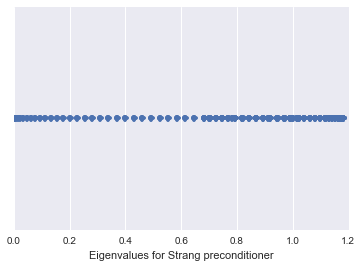

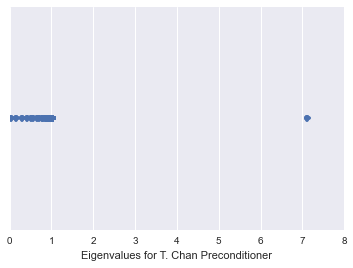

In [11]:
import numpy as np
import scipy.linalg as sp
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
n = 100
c = np.zeros(n)
c[0] = -2
c[1] = 1
Tm = sp.toeplitz(c, c)


c1 = sp.circulant(c) #Strang preconditioner
Fmat = 1.0/np.sqrt(n) * np.fft.fft(np.eye(n)) #Poor man's Fourier matrix

d2 = np.diag(Fmat.conj().dot(Tm).dot(Fmat))
c2 = Fmat.dot(np.diag(d2)).dot(Fmat.conj().T)


mat = np.linalg.inv(c1).dot(Tm)
ev = np.linalg.eigvals(mat).real
plt.plot(np.sort(ev), np.ones(n), 'o')
plt.xlabel('Eigenvalues for Strang preconditioner')
plt.gca().get_yaxis().set_visible(False)

mat = np.linalg.inv(c2).dot(Tm)
ev = np.linalg.eigvals(mat).real
plt.figure()
plt.plot(np.sort(ev), np.ones(n), 'o')
plt.xlabel('Eigenvalues for T. Chan Preconditioner')
plt.gca().get_yaxis().set_visible(False)

<matplotlib.contour.QuadContourSet instance at 0x000000001F1F6E08>

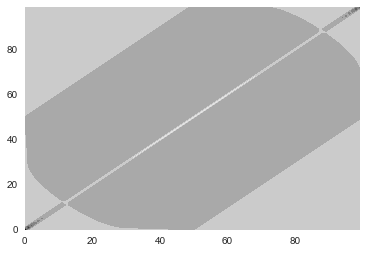

In [15]:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
n = 100
c = np.zeros(n)
c = [1.0/(i - 0.5) for i in range(n)]

Tm = sp.toeplitz(c, c)


c1 = sp.circulant(c) #Strang preconditioner
Fmat = 1.0/np.sqrt(n) * np.fft.fft(np.eye(n)) #Poor man's Fourier matrix

T_tranf = Fmat.conj().dot(Tm).dot(Fmat)


plt.contourf(T_tranf.real)

In [16]:
np.linalg.svd(T_tranf[n/2:, :n/2])[1]

array([  2.27780685e+00,   7.37999794e-01,   1.94219019e-01,
         5.40497550e-02,   8.37677321e-03,   1.92571134e-03,
         2.02289383e-04,   4.32180718e-05,   3.44468290e-06,
         7.14194874e-07,   4.44474422e-08,   9.09926997e-09,
         4.46711624e-10,   9.13366012e-11,   3.55174276e-12,
         7.31920335e-13,   2.22877600e-14,   6.00017269e-15,
         5.44020985e-15,   4.93736021e-15,   4.31724571e-15,
         3.64065493e-15,   3.43023018e-15,   3.32904450e-15,
         2.93193317e-15,   2.77079114e-15,   2.58029499e-15,
         2.43739476e-15,   2.17995205e-15,   2.02309889e-15,
         1.82997068e-15,   1.70489713e-15,   1.53768450e-15,
         1.49819565e-15,   1.35069261e-15,   1.27211983e-15,
         1.18045755e-15,   1.10926425e-15,   9.96803285e-16,
         8.79822786e-16,   8.00720936e-16,   6.96315691e-16,
         5.77140119e-16,   5.28553737e-16,   4.43893779e-16,
         3.18911897e-16,   2.11790117e-16,   1.81890517e-16,
         1.48987749e-16,

In [17]:
import numpy as np
eps = 0.5
p = 4
a = np.eye(p)
for i in xrange(p-1):
    a[i, i+1] = 1
    
a[p-1, 2] = eps
a = np.array(a)
val, vec = np.linalg.eig(a)
#print a
print np.linalg.norm(a - vec.dot(np.diag(val)).dot(np.linalg.inv(vec)))
#print 'S * D * S^{-1}:' 
#print vec.dot(np.diag(val)).dot(np.linalg.inv(vec))
print a

2.2360679775
[[ 1.   1.   0.   0. ]
 [ 0.   1.   1.   0. ]
 [ 0.   0.   1.   1. ]
 [ 0.   0.   0.5  1. ]]


In [18]:
import numpy as np
eps = 1e-14
p = 5
a = np.eye(p)
for i in xrange(p-1):
    a[i, i+1] = 1
    
a[p-1, 0] = eps
a = np.array(a)
val, vec = np.linalg.eig(a)
print np.linalg.norm(a - vec.dot(np.diag(val)).dot(np.linalg.inv(vec)))

fun = lambda x: np.exp(x)

#Using diagonalization
fun_diag = vec.dot(np.diag(fun(val))).dot(np.linalg.inv(vec))


#Using Schur
import scipy
fun_m = scipy.linalg.expm(a)
np.linalg.norm(fun_m - fun_diag)

3.43333212228e-05


9.6155265491682461e-05

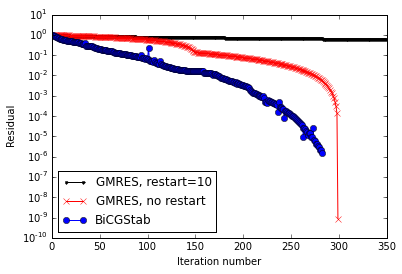

In [2]:
#### import numpy as np
import scipy.sparse.linalg
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
n = 300
ex = np.ones(n);
lp1 = -sp.sparse.spdiags(np.vstack((ex,  -(2 + 1./n)*ex, (1 + 1./n) * ex)), [-1, 0, 1], n, n, 'csr'); 
rhs = np.ones(n)
ee = sp.sparse.eye(n)

#lp2 = sp.kron(lp1, ee) + sp.kron(ee, lp1)
#rhs = np.ones(n * n)
res_all = []
res_all_no = []
res_all_bicg = []
def my_print(r):
    res_all.append(r)
    
def my_print1(r):
    res_all_no.append(r)

def my_print2(x): #For BiCGStab they have another callback, please rewrite
    res_all_bicg.append(np.linalg.norm(lp1.dot(x) - rhs))
    
#res_all_bicg = np.array(res_all_bicg)
sol = scipy.sparse.linalg.gmres(lp1, rhs, restart=20, callback=my_print)
sol1 = scipy.sparse.linalg.gmres(lp1, rhs, restart=n, callback=my_print1)
sol2 = scipy.sparse.linalg.bicgstab(lp1, rhs, x0=np.zeros(n), callback=my_print2)
res_all_bicg = np.array(res_all_bicg)/res_all_bicg[0]

lim = 350
plt.semilogy(res_all[:lim], marker='.',color='k', label='GMRES, restart=10')
plt.semilogy(res_all_no[:lim], marker='x',color='r', label='GMRES, no restart')
plt.semilogy(res_all_bicg[:lim], label='BiCGStab', marker='o')

plt.xlabel('Iteration number')
plt.ylabel('Residual')
plt.legend(loc='best')
